## Make finder charts of TESS, Kepler, or K2 observations using mkpy3

Show the notebook information:

In [1]:
import os
print(os.getcwd(),' =$PWD')
nb = 'nb_tpf_finder_charts_v1.ipynb'
version = '2020OCT19T1448  v1.06'
print(nb,version)

/Users/kmighell/top/github/mkpy3/mkpy3  =$PWD
nb_tpf_finder_charts_v1.ipynb 2020OCT19T1448  v1.06


Current working directory:

In [2]:
print(os.getcwd())

/Users/kmighell/top/github/mkpy3/mkpy3


Make sure that lightkurve has been installed:

In [3]:
import sys
try:
    import lightkurve as lk
except Exception:
    print('\n***** ERROR *****\n')
    print('The Python package lightkurve needs to be installed.\n')
    print('This is the installation command for lightkurve using pip:\n')
    print('pip install lightkurve --upgrade\n')
    print('For further installation details see the lightkurve homepage:\n')
    print('https://docs.lightkurve.org/about/install.html\n')
    sys.exit(1)
# pass:try
print(lk.__version__, ' : lightkurve version')

2.0a2.dev  : lightkurve version


Import external packages:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import ntpath
import datetime
import astropy.units as u
import astropy.visualization as av
import reproject as rp  # pip install reproject
import lightkurve as lk

Import mpkpy3 software.  Source: https://github.com/KenMighell/mkpy3 (GitHub repository)

In [5]:
import mkpy3_plot_add_compass_rose_v5 as km1
import mkpy3_tpf_overlay_v6 as km2

In [6]:
cmap = 'gray_r'  # USER CUSTOMIZE
verbose = False  # USER CUSTOMIZE
frame = 1        # USER CUSTOMIZE
tpf = None

In [7]:
object = 1  # 1, 2, 3, 4, or 5  # <--- USER CUSTOMIZE
print(object, '=object')

1 =object


In [8]:
mission = None
if (object == 1):
    target = 'CD Ind'
    sector = 1
    mission = 'TESS'
elif (object == 2):
    target = 'XZ Cyg'
    sector = 14
    mission = 'TESS'
elif (object == 3):
    target = 'V1460 Her'
    sector = 24
    mission = 'TESS'
# pass:if
if (mission == 'TESS'):
    width_height_arcmin = 6  # USER CUSTOMIZE
    north_arm_arcsec = 42    # USER CUSTOMIZE
    percentile = 99.9        # USER CUSTOMIZE
    title_ = target + ' : TESS : Sector ' + str(sector)  # USER CUSTOMIZE
    title2_ = title_ + " : Frame " + str(frame)          # USER CUSTOMIZE
    print('DOWNLOAD START:', str(datetime.datetime.now()))
    search_results = lk.search_tesscut(target=target, sector=sector)
    tpf = search_results[0].download(cutout_size=(11, 11), quality_bitmask=0)
    print('DOWNLOAD  STOP:', str(datetime.datetime.now()))
    print(tpf)
# pass:if

DOWNLOAD START: 2020-10-19 14:48:40.053180
DOWNLOAD  STOP: 2020-10-19 14:48:45.834740
TessTargetPixelFile(TICID: CD Ind)


In [9]:
if (object == 4):
    target = 'Kepler-138b'  # exoplanet Kelper-138b is "KIC 7603200"
    quarter = 10
    mission = 'Kepler'
    title_ = target + ' : Kepler : Quarter ' + str(quarter)  # USER CUSTOMIZE
    kwarg = {'quarter': quarter}
elif (object == 5):
    target = 'K2-34b'       # exoplanet K2-34b is "EPIC 212110888"
    campaign = 18
    mission = 'K2'
    title_ = target + ' : K2 : Campaign ' + str(campaign)   # USER CUSTOMIZE
    kwarg = {'campaign': campaign}
# pass:if
if ((mission == 'Kepler') or (mission == 'K2')):
    width_height_arcmin = 1.8  # USER CUSTOMIZE
    north_arm_arcsec = 6       # USER CUSTOMIZE
    percentile = 99.0          # USER CUSTOMIZE
    title2_ = title_ + " : Frame " + str(frame)  # USER CUTOMIZE
    print('DOWNLOAD START:', str(datetime.datetime.now()))
    tpf = lk.search_targetpixelfile(
      target=target, mission=mission, **kwarg).download(quality_bitmask=0)
    print('DOWNLOAD  STOP:', str(datetime.datetime.now()))
    print(tpf)
# pass:if

In [10]:
print(mission, '=mission')
print(target, '=target')
if (mission.lower() == 'kepler'):
    print(quarter, '=quarter')
# pass:if
if (mission.lower() == 'k2'):
    print(campaign, '=campaign')
# pass:if
if (mission.lower() == 'tess'):
    print(sector, '=sector')
# pass:if

tpf_dir = os.path.dirname(tpf.path)
tpf_file = ntpath.basename(tpf.path)
cwd = os.getcwd()
print('\n         CWD:', cwd)
print(' TPF dirname:', tpf_dir)
print('TPF filename:', tpf_file)

print()
print(tpf)
print('^--- tpf')
if (verbose):
    print()
    print(tpf.wcs)
    print('^--- tpf.wcs')
# pass:if

TESS =mission
CD Ind =target
1 =sector

         CWD: /Users/kmighell/top/github/mkpy3/mkpy3
 TPF dirname: /Users/kmighell/.lightkurve-cache/tesscut
TPF filename: tess-s0001-2-4_318.920640_-58.681780_11x11_astrocut.fits

TessTargetPixelFile(TICID: CD Ind)
^--- tpf


Show an enhanced standard lightkurve TargetPixelFile (tpf) plot:


 mkpy3_plot1.png  <--- new PNG file written


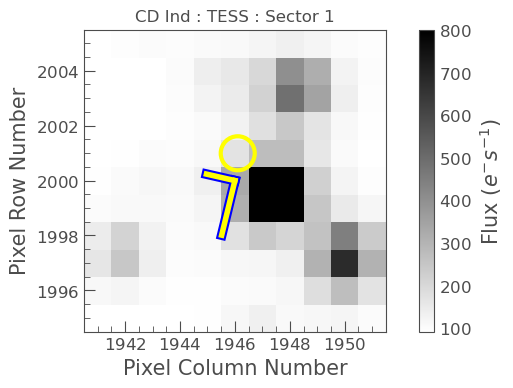


The YELLOW CIRCLE shows the location of the TARGET.

The LONG ARM of the compass rose points NORTH
The SHORT ARM of the compass rose points EAST


In [11]:
import mkpy3_plot_add_compass_rose_v5 as km1

ax = tpf.plot(frame=frame, cmap=cmap)
# add a compass rose
km1.mkpy3_plot_add_compass_rose_v5(ax=ax, north_arm_arcsec=north_arm_arcsec,
  wcs=tpf.wcs, verbose=verbose)
# mark the target with a yellow circle
target_wx0, target_wy0 = tpf.wcs.wcs_world2pix(tpf.ra, tpf.dec, 0)
marker_kwargs = \
  {'edgecolor': 'yellow', 's': 600, 'facecolor': 'None', 'lw': 3, 'zorder': 10}
ax.scatter(target_wx0 + tpf.column, target_wy0 + tpf.row, **marker_kwargs)
# change the title
ax.set_title(title_)
# save the plot
oplot1 = 'mkpy3_plot1.png'
plt.savefig(oplot1, bbox_inches="tight")
print('\n', oplot1, ' <--- new PNG file written')
# show the plot
plt.show()
# close the plot
plt.close()
print()
print('The YELLOW CIRCLE shows the location of the TARGET.')
print()
print('The LONG ARM of the compass rose points NORTH')
print('The SHORT ARM of the compass rose points EAST')

Show the same data but with the right ascension and declination grid:


 mkpy3_plot2.png  <--- plot file written


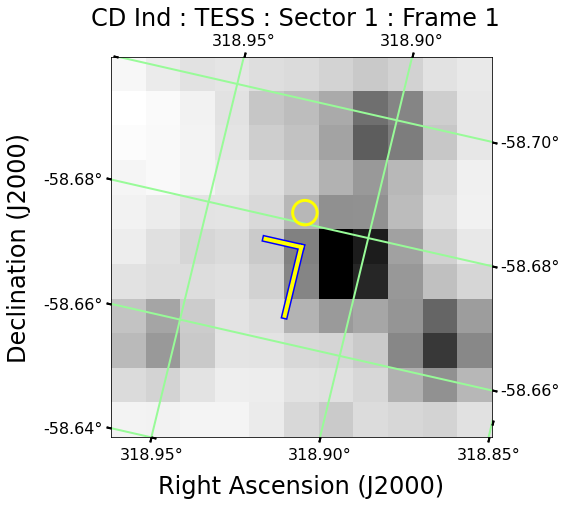

The right ascension and declination grid is now displayed on top of the data.


In [12]:
import mkpy3_plot_add_compass_rose_v5 as km1

# open the plot
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=tpf.wcs)
# show the data
image_data = tpf.flux[frame]
norm = av.ImageNormalize(image_data, interval=av.PercentileInterval(percentile),
  stretch=av.SqrtStretch())
ax.imshow(image_data, norm=norm, cmap=cmap)
ax.set_xlabel('Right Ascension (J2000)', size=24)
ax.set_ylabel('Declination (J2000)', size=24)

# fancy plot settings
ax.tick_params(axis='x', labelsize=16, length=5, width=2, labeltop=True,
  labelbottom=True)
ax.tick_params(axis='y', labelsize=16, length=5, width=2, labelright=True,
  labelleft=True)
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')

# show the RA and DEC grid
ax.grid(True, color='palegreen', lw=2, zorder=1)

# add a compass rose
km1.mkpy3_plot_add_compass_rose_v5(ax=ax, north_arm_arcsec=north_arm_arcsec,
  wcs=tpf.wcs, verbose=verbose)
# mark the target with a yellow circle
marker_kwargs =\
  {'edgecolor': 'yellow', 's': 600, 'facecolor': 'None', 'lw': 3, 'zorder': 10}
ax.scatter(tpf.ra, tpf.dec, transform=ax.get_transform('icrs'), **marker_kwargs)
# change the suptitle
fig.suptitle(title2_, size=24)
# save the plot
oplot2 = 'mkpy3_plot2.png'
plt.savefig(oplot2, dpi=150, bbox_inches="tight")
print('\n', oplot2, ' <--- plot file written')
# show the plot
plt.show()
#close the plot
plt.close()
print('The right ascension and declination grid is now displayed on top of the data.')

The target star is not really obvious.  What are those other stars in the field?

Show the TPF pixel overlay on top of a rotated a digitized Sky Survey 2 Red survey image:


***** ROTATE IMAGE *****:
-13.632673427908458 =survey_rotate_deg

152.735065 =radius_arcsec  (0.600000 =shrink)

False =print_gaia_dr2
^--- set this keyword argument to True to print the GAIA DR2 catalog results.

False =print_vsx
^--- set this keyword argument to True to print the VSX catalog results.

318.92064 =ra_deg
-58.68178 =dec_deg

0 =cadenceno
0 =frame

 mkpy3_plot3.png  <--- new PNG file written


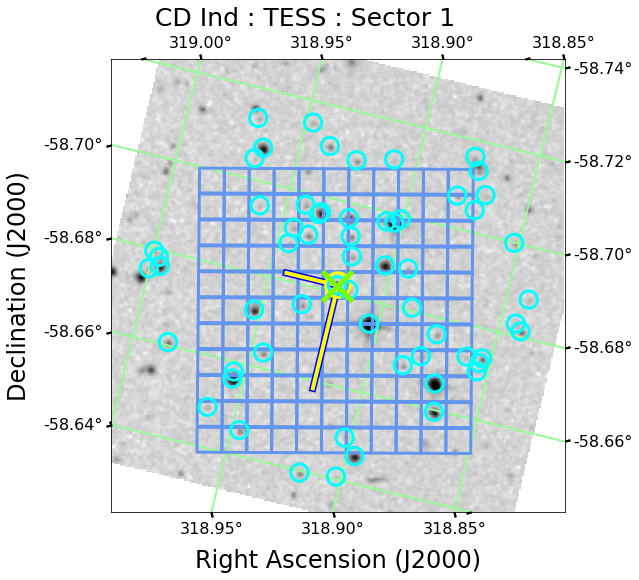

CYAN CIRCLES show GAIA DR2 catalog stars.
GREEN X shows the only VSX catalog star in the field (the target).


In [13]:
import mkpy3_plot_add_compass_rose_v5 as km1
import mkpy3_tpf_overlay_v6 as km2

print_gaia_dr2 = False  # do not show the GAIA DR2 catalog stars
print_vsx = False       # do not show the VSX catalog stars
shrink = 0.6
#
# compute rotation based on the WCS of the TPF:
rotationAngle_deg = 'tpf'
#
ax = km2.mkpy3_tpf_overlay_v6(tpf=tpf, survey='DSS2 Red',
  rotationAngle_deg=rotationAngle_deg,
  width_height_arcmin=width_height_arcmin, percentile=percentile,
  shrink=shrink, show_plot=False, plot_file='', title=title_,
  print_gaia_dr2=print_gaia_dr2, print_vsx=print_vsx, verbose=verbose)
# fancy plot settings
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')
ax.tick_params(axis='x', labelsize=16, length=5, width=2, labeltop=True,
  labelbottom=True)
ax.tick_params(axis='y', labelsize=16, length=5, width=2, labelright=True,
  labelleft=True)
# show the RA and DEC grid
ax.grid(True, color='palegreen', lw=2, zorder=1)
# add a compass rose
km1.mkpy3_plot_add_compass_rose_v5(ax=ax, north_arm_arcsec=2 * north_arm_arcsec)
# save the plot
oplot3 = 'mkpy3_plot3.png'
plt.savefig(oplot3, bbox_inches="tight")
print('\n', oplot3, ' <--- new PNG file written')
# show the plot
plt.show()
# close the plot
plt.close()
print('CYAN CIRCLES show GAIA DR2 catalog stars.')
print('GREEN X shows the only VSX catalog star in the field (the target).')

### Note that the orientation of this finder charts matches the orientation of the two previous finder charts.  But now we can identify the brighter GAIA DR2 stars in the field.

Print catalog information of a few nearby GAIA DR2 stars and the VSX star:


***** ROTATE IMAGE *****:
-13.632673427908458 =survey_rotate_deg

50.911688 =radius_arcsec  (0.200000 =shrink)

True =print_gaia_dr2
^--- set this keyword argument to False to *not* print the GAIA DR2 catalog results.


# GAIA DR2 : Global Astrometric Interferometer for Astrophysics-- Data Release 2
# n GAIA2_Source             sep    RA_ICRS      DE_ICRS       pmRA     pmDE      Plx     Gmag
#                       [arcsec]    [deg]        [deg]      [mas/yr] [mas/yr]    [mas]    [mag]
  1 6453536224527716224    1.130  318.9210237  -58.6816836   26.822  -23.321    4.097   17.128
  2 6453442383787165440    9.078  318.9158185  -58.6813079    5.319   -8.231    1.392   20.188
  3 6453441632168205952   25.376  318.9177462  -58.6886481   -2.025   -2.507   -0.089   19.342
  4 6453535468613471616   32.449  318.9335965  -58.6758084   13.720   -9.652    2.053   18.450
  5 6453442388082450304   38.943  318.9039443  -58.6751221   20.134  -19.038    0.536   11.818
  6 6453441632168205568   40.159

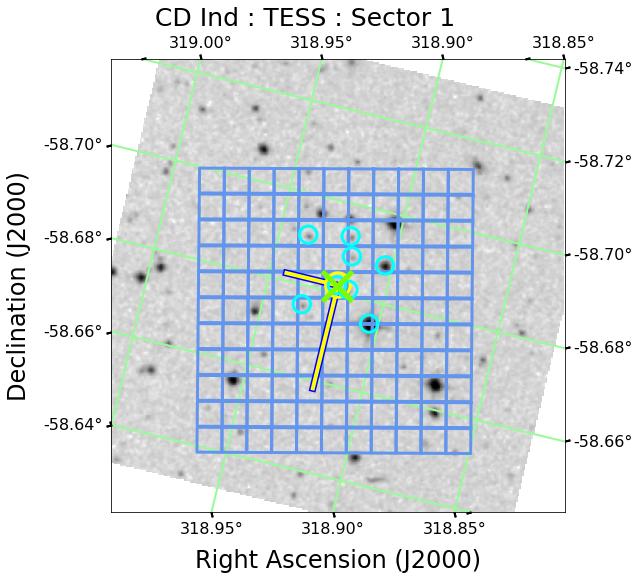

CYAN CIRCLES show GAIA DR2 catalog stars.
GREEN X shows the only VSX catalog star in the field (the target).


In [14]:
import mkpy3_plot_add_compass_rose_v5 as km1
import mkpy3_tpf_overlay_v6 as km2

print_gaia_dr2 = True  # show GAIA DR2 catalog stars
print_vsx = True       # show VSX catalog stars
shrink = 0.2  # ranges from 0.0 (show no catalog stars) to 1.0 (show all catalog stars)
#
# compute rotation based on the WCS of the TPF:
rotationAngle_deg = 'tpf'
#
ax = km2.mkpy3_tpf_overlay_v6(tpf=tpf, survey='DSS2 Red',
  rotationAngle_deg=rotationAngle_deg, 
  width_height_arcmin=width_height_arcmin, percentile=percentile,
  shrink=shrink, show_plot=False, plot_file='', title=title_,
  print_gaia_dr2=print_gaia_dr2, print_vsx=print_vsx, verbose=verbose)
# fancy plot settings
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')
ax.tick_params(axis='x', labelsize=16, length=5, width=2, labeltop=True,
  labelbottom=True)
ax.tick_params(axis='y', labelsize=16, length=5, width=2, labelright=True,
  labelleft=True)
# show the RA and DEC grid
ax.grid(True, color='palegreen', lw=2, zorder=1)
# add a compass rose
km1.mkpy3_plot_add_compass_rose_v5(ax=ax, north_arm_arcsec=2 * north_arm_arcsec)
# save the plot
oplot3 = 'mkpy3_plot3.png'
plt.savefig(oplot3, bbox_inches="tight")
print('\n', oplot3, ' <--- new PNG file written')
# show the plot
plt.show()
# close the plot
plt.close()
print('CYAN CIRCLES show GAIA DR2 catalog stars.')
print('GREEN X shows the only VSX catalog star in the field (the target).')

## Note that the orientation of this plot matches that of the finder charts shown in standard tpf.plot() seen in cell \#11 and cell \#12

As before but as a standard finder chart with NORTH being UP and EAST being LEFT:


50.911688 =radius_arcsec  (0.200000 =shrink)

True =print_gaia_dr2
^--- set this keyword argument to False to *not* print the GAIA DR2 catalog results.


# GAIA DR2 : Global Astrometric Interferometer for Astrophysics-- Data Release 2
# n GAIA2_Source             sep    RA_ICRS      DE_ICRS       pmRA     pmDE      Plx     Gmag
#                       [arcsec]    [deg]        [deg]      [mas/yr] [mas/yr]    [mas]    [mag]
  1 6453536224527716224    1.130  318.9210237  -58.6816836   26.822  -23.321    4.097   17.128
  2 6453442383787165440    9.078  318.9158185  -58.6813079    5.319   -8.231    1.392   20.188
  3 6453441632168205952   25.376  318.9177462  -58.6886481   -2.025   -2.507   -0.089   19.342
  4 6453535468613471616   32.449  318.9335965  -58.6758084   13.720   -9.652    2.053   18.450
  5 6453442388082450304   38.943  318.9039443  -58.6751221   20.134  -19.038    0.536   11.818
  6 6453441632168205568   40.159  318.9202772  -58.6928990    2.736   -6.779    0.274   18.340
  7

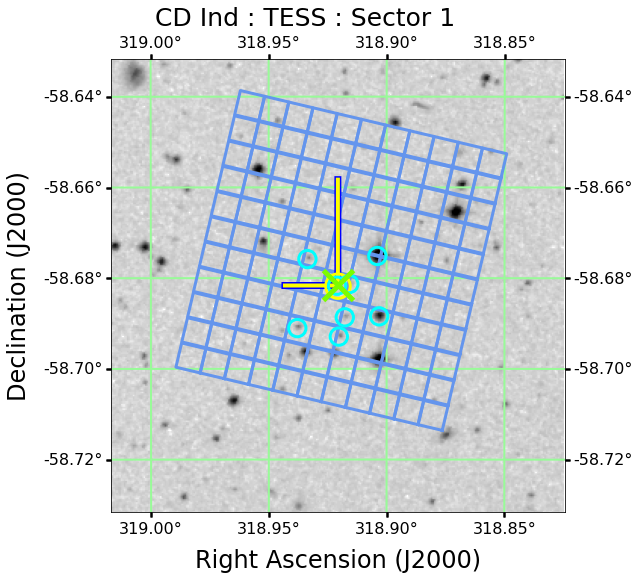

In [15]:
import mkpy3_plot_add_compass_rose_v5 as km1
import mkpy3_tpf_overlay_v6 as km2

print_gaia_dr2 = True  # show GAIA DR2 catalog stars
print_vsx = True       # show VSX catalog stars
shrink = 0.2  # ranges from 0.0 (show no catalog stars) to 1.0 (show all catalog stars)
#
# no rotation
rotationAngle_deg = 0.0
#
ax = km2.mkpy3_tpf_overlay_v6(tpf=tpf, survey='DSS2 Red',
  rotationAngle_deg=rotationAngle_deg,
  width_height_arcmin=width_height_arcmin, percentile=percentile,
  shrink=shrink, show_plot=False, plot_file='', title=title_,
  print_gaia_dr2=print_gaia_dr2, print_vsx=print_vsx, verbose=verbose)
# fancy plot settings
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')
ax.tick_params(axis='x', labelsize=16, length=5, width=2, labeltop=True,
  labelbottom=True)
ax.tick_params(axis='y', labelsize=16, length=5, width=2, labelright=True,
  labelleft=True)
# show the RA and DEC grid
ax.grid(True, color='palegreen', lw=2, zorder=1)
# add a compass rose
km1.mkpy3_plot_add_compass_rose_v5(ax=ax, north_arm_arcsec=2 * north_arm_arcsec)
# save the plot
oplot4 = 'mkpy3_plot4.png'
plt.savefig(oplot4, bbox_inches="tight")
print('\n', oplot4, ' <--- new PNG file written')
# show the plot
plt.show()
# close the plot
plt.close()

In [16]:
# ==========================================================================================
# EOF ======================================================================================
# ==========================================================================================